In [ ]:
#@title Installing Packages

install.packages("sqldf")    # SQL within R
install.packages("dplyr")    # Data manipulation
install.packages("ggplot2")  # Visualization

library(sqldf)
library(dplyr)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#@title Loading the Ideas dataset


url <- "https://raw.githubusercontent.com/User13212/GreenFuture-Analytics/refs/heads/main/greenfuture_ideas_dataset.csv"
ideas <- read.csv(url, header = TRUE, stringsAsFactors = FALSE)

In [ ]:
colnames(ideas) <- c(
  "Employee.ID", "Office.Location", "Department", "Idea.Submission.Date",
  "Idea.Title", "Idea.Category", "Number.of.Votes", "Collaboration.Status",
  "Approval.Status", "Implementation.Status", "Security.Concern.Flag"
)


head(ideas)



,Employee.ID,Office.Location,Department,Idea.Submission.Date,Idea.Title,Idea.Category,Number.of.Votes,Collaboration.Status,Approval.Status,Implementation.Status,Security.Concern.Flag
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,587b45d8,Germany,Renewable Energy,16/04/2024,Idea 1,Sustainable Transport,231,Single Contributor,Pending,Not Started,No
2,0d3e8b8e,Canada,Renewable Energy,14/01/2024,Idea 2,Water Management,477,Cross-Regional Team,Approved,In Progress,No
3,fa012fe7,France,Environmental Policy,10/01/2025,Idea 3,Renewable Energy,48,Cross-Regional Team,Approved,Not Started,Yes
4,cb8ed680,Japan,Technology,24/12/2023,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No
5,333fff26,Australia,Technology,13/02/2025,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No
6,a34ebb0f,India,Technology,08/09/2024,Idea 6,Circular Economy,431,Single Contributor,Rejected,Not Started,No


In [ ]:
#@title SQL Statements.

#Connect to an in-memory SQLite database
con <- dbConnect(SQLite(), ":memory:")
dbWriteTable(con, "ideas", ideas, overwrite = TRUE)

In [ ]:
#SELECT

germany_ideas <- dbGetQuery(con, "
  SELECT *
  FROM ideas
  WHERE [Office.Location] = 'Germany';
")
print("Top Germany submissions:")
print(head(germany_ideas))

[1] "Top Germany submissions:"
  Employee.ID Office.Location        Department Idea.Submission.Date Idea.Title
1    587b45d8         Germany  Renewable Energy           16/04/2024     Idea 1
2    018d372d         Germany        Technology           16/08/2024    Idea 17
3    d0bca6c7         Germany    Infrastructure           24/02/2024    Idea 30
4    67ed2b36         Germany          Research           22/03/2023    Idea 34
5    b04c85a9         Germany Urban Development           22/09/2023    Idea 35
6    a76009fe         Germany    Infrastructure           08/05/2023    Idea 37
          Idea.Category Number.of.Votes Collaboration.Status Approval.Status
1 Sustainable Transport             231   Single Contributor         Pending
2      Water Management               2  Cross-Regional Team        Approved
3 Sustainable Transport              37  Cross-Regional Team        Rejected
4          Smart Cities             308   Single Contributor         Pending
5      Circular Economy 

In [ ]:
# INSERT
insert_sql <- "
  INSERT INTO ideas (
    [Employee.ID], [Office.Location], Department, [Idea.Submission.Date],
    [Idea.Title], [Idea.Category], [Number.of.Votes], [Collaboration.Status],
    [Approval.Status], [Implementation.Status], [Security.Concern.Flag]
  ) VALUES (
    '3001', 'Berlin', 'R&D', '2025-05-01',
    'Smart Waste Sensors', 'Technology', 0, 'Single Contributor',
    'Pending', 'Not Started', 'No'
  );
"
dbExecute(con, insert_sql)
print("After INSERT, newly inserted record:")
print(dbGetQuery(con, "
  SELECT *
  FROM ideas
  WHERE [Employee.ID] = '3001';
"))

[1] 1

[1] "After INSERT, newly inserted record:"
  Employee.ID Office.Location Department Idea.Submission.Date
1        3001          Berlin        R&D           2025-05-01
           Idea.Title Idea.Category Number.of.Votes Collaboration.Status
1 Smart Waste Sensors    Technology               0   Single Contributor
  Approval.Status Implementation.Status Security.Concern.Flag
1         Pending           Not Started                    No


In [ ]:
print(dbGetQuery(con, "
  SELECT *
  FROM ideas
  ORDER BY [Number.of.Votes] DESC
  LIMIT 6;
"))


  Employee.ID Office.Location        Department Idea.Submission.Date Idea.Title
1    f2105213             USA    Infrastructure           20/12/2024   Idea 422
2    18b9a7b4           China    Infrastructure           17/06/2023   Idea 915
3    7d239d23             USA Urban Development           18/10/2024  Idea 1020
4    c9a9b03d          Brazil          Research           09/08/2024  Idea 1146
5    7fde2f60          France    Infrastructure           06/01/2024  Idea 1323
6    be71d545          Brazil        Technology           20/01/2025  Idea 2573
          Idea.Category Number.of.Votes Collaboration.Status Approval.Status
1      Water Management             500   Single Contributor        Rejected
2 Sustainable Transport             500  Cross-Regional Team        Rejected
3      Circular Economy             500  Cross-Regional Team        Approved
4      Renewable Energy             500   Single Contributor        Rejected
5      Circular Economy             500   Single Contri

In [ ]:
# UPDATE
dbExecute(con, "
  UPDATE ideas
  SET [Number.of.Votes] = [Number.of.Votes] + 1
  WHERE [Approval.Status] = 'Approved';
")
print("After UPDATE, top of ideas:")
print(dbGetQuery(con, "
  SELECT *
  FROM ideas
  ORDER BY [Number.of.Votes] DESC
  LIMIT 6;
"))

[1] 1037

[1] "After UPDATE, top of ideas:"
  Employee.ID Office.Location        Department Idea.Submission.Date Idea.Title
1    7d239d23             USA Urban Development           18/10/2024  Idea 1020
2    f2105213             USA    Infrastructure           20/12/2024   Idea 422
3    18b9a7b4           China    Infrastructure           17/06/2023   Idea 915
4    c9a9b03d          Brazil          Research           09/08/2024  Idea 1146
5    7fde2f60          France    Infrastructure           06/01/2024  Idea 1323
6    de5ed43f             USA        Technology           09/03/2024  Idea 2310
          Idea.Category Number.of.Votes Collaboration.Status Approval.Status
1      Circular Economy             501  Cross-Regional Team        Approved
2      Water Management             500   Single Contributor        Rejected
3 Sustainable Transport             500  Cross-Regional Team        Rejected
4      Renewable Energy             500   Single Contributor        Rejected
5      Circular Econo

In [ ]:
# DELETE
dbExecute(con, "
  DELETE FROM ideas
  WHERE [Security.Concern.Flag] = 'Yes';
")
print("After DELETE, top of ideas:")
print(dbGetQuery(con, "
  SELECT *
  FROM ideas
  LIMIT 6;
"))

[1] 267

[1] "After DELETE, top of ideas:"
  Employee.ID Office.Location       Department Idea.Submission.Date Idea.Title
1    587b45d8         Germany Renewable Energy           16/04/2024     Idea 1
2    0d3e8b8e          Canada Renewable Energy           14/01/2024     Idea 2
3    cb8ed680           Japan       Technology           24/12/2023     Idea 4
4    333fff26       Australia       Technology           13/02/2025     Idea 5
5    a34ebb0f           India       Technology           08/09/2024     Idea 6
6    92f7e972          Mexico   Infrastructure           07/10/2024     Idea 7
          Idea.Category Number.of.Votes Collaboration.Status Approval.Status
1 Sustainable Transport             231   Single Contributor         Pending
2      Water Management             478  Cross-Regional Team        Approved
3      Circular Economy             331  Cross-Regional Team        Approved
4      Circular Economy             429   Single Contributor        Approved
5      Circular Economy     

In [ ]:
#@title Mathematical Expressions, Aggregate & Arithmetic Functions

In [ ]:
#Growth in monthly submissions (month-over-month percentage change)

ideas$Date <- as.Date(ideas$`Idea.Submission.Date`, format = "%d/%m/%Y")
monthly_counts <- ideas %>%
  group_by(Month = format(Date, "%Y-%m")) %>%
  summarise(Count = n()) %>%
  arrange(Month) %>%
  mutate(
    PrevCount = lag(Count),
    MoM_Pct_Change = round((Count - PrevCount) * 100.0 / PrevCount, 2)
  )
print("Monthly submissions with MoM % change:")
print(monthly_counts)


[1] "Monthly submissions with MoM % change:"
# A tibble: 25 × 4
   Month   Count PrevCount MoM_Pct_Change
   <chr>   <int>     <int>          <dbl>
 1 2023-03   107        NA          NA   
 2 2023-04   121       107          13.1 
 3 2023-05   145       121          19.8 
 4 2023-06   121       145         -16.6 
 5 2023-07   124       121           2.48
 6 2023-08   121       124          -2.42
 7 2023-09   128       121           5.79
 8 2023-10   132       128           3.12
 9 2023-11   112       132         -15.2 
10 2023-12   115       112           2.68
# ℹ 15 more rows


In [ ]:
#Security-concern proportion by department

sec_prop <- ideas %>%
  group_by(Department) %>%
  summarise(
    Total = n(),
    SecurityCount = sum(Security.Concern.Flag == "Yes"),
    SecurityPct = round(SecurityCount * 100.0 / Total, 2)
  )
print("Security-concern percentage by department:")
print(sec_prop)


[1] "Security-concern percentage by department:"
# A tibble: 6 × 4
  Department           Total SecurityCount SecurityPct
  <chr>                <int>         <int>       <dbl>
1 Environmental Policy   499            46        9.22
2 Infrastructure         547            46        8.41
3 Renewable Energy       513            44        8.58
4 Research               498            52       10.4 
5 Technology             457            39        8.53
6 Urban Development      486            40        8.23


In [ ]:
#@title SQL Queries in R for Innovation Analysis and Optimization

#Objective: Extract meaningful insights on submissions, voting patterns, collaboration trends, approval rates, and regional participation.laboration.

In [ ]:
# 1. Total submissions & percent by region

# Insight: Identifies which offices drive the majority of ideas.


region_pct <- dbGetQuery(con, "
  SELECT [Office.Location] AS Region,
         COUNT(*) AS TotalIdeas,
         ROUND( COUNT(*) * 100.0 /
                (SELECT COUNT(*) FROM ideas), 2) AS PctOfAll
  FROM ideas
  GROUP BY [Office.Location]
  ORDER BY TotalIdeas DESC;
")
print("Submissions and percent by region:")
print(region_pct)

[1] "Submissions and percent by region:"
         Region TotalIdeas PctOfAll
1         China        256     9.36
2        France        248     9.07
3  South Africa        239     8.74
4         Japan        239     8.74
5            UK        233     8.52
6        Canada        231     8.45
7       Germany        221     8.08
8           USA        220     8.05
9     Australia        219     8.01
10       Mexico        216     7.90
11       Brazil        210     7.68
12        India        201     7.35
13       Berlin          1     0.04


In [ ]:

# 2. Approval rate per region

# Insight: Highlights regions where ideas are more likely to be approved.

approval_rate <- dbGetQuery(con, "
  SELECT [Office.Location] AS Region,
         ROUND( SUM(CASE WHEN [Approval.Status] = 'Approved' THEN 1 ELSE 0 END)
                * 100.0 / COUNT(*), 2) AS ApprovalPct
  FROM ideas
  GROUP BY [Office.Location]
  ORDER BY ApprovalPct DESC;
")
print("Approval rate by region:")
print(approval_rate)


[1] "Approval rate by region:"
         Region ApprovalPct
1  South Africa       41.42
2        Brazil       37.62
3            UK       36.91
4           USA       36.82
5       Germany       36.20
6         China       35.94
7        Mexico       33.80
8        Canada       33.77
9     Australia       33.33
10        Japan       33.05
11        India       30.35
12       France       28.63
13       Berlin        0.00


In [ ]:

# 3. Average votes by collaboration status

# Insight: Determines whether collaborative ideas receive more peer validation.

avg_votes_collab <- dbGetQuery(con, "
  SELECT [Collaboration.Status] AS CollabType,
         ROUND( AVG([Number.of.Votes]), 2) AS AvgVotes,
         COUNT(*) AS CountIdeas
  FROM ideas
  GROUP BY [Collaboration.Status];
")
print("Average votes by collaboration status:")
print(avg_votes_collab)




[1] "Average votes by collaboration status:"
           CollabType AvgVotes CountIdeas
1 Cross-Regional Team   248.06       1330
2  Single Contributor   247.22       1404


In [ ]:


# 4. Vote-to-approval ratio per category

# Insight: Indicates which categories generate votes that translate into approvals most efficiently.

vote_approval <- dbGetQuery(con, "
  SELECT [Idea.Category] AS Category,
         ROUND( SUM([Number.of.Votes]) * 1.0 /
                SUM(CASE WHEN [Approval.Status] = 'Approved' THEN [Number.of.Votes] ELSE 0 END), 2)
           AS VoteToApprovedVotesRatio
  FROM ideas
  GROUP BY [Idea.Category];
")
print("Vote-to-approved-votes ratio by category:")
print(vote_approval)



[1] "Vote-to-approved-votes ratio by category:"
               Category VoteToApprovedVotesRatio
1        Carbon Capture                     3.39
2      Circular Economy                     2.56
3      Renewable Energy                     2.92
4          Smart Cities                     2.92
5 Sustainable Transport                     2.61
6            Technology                       NA
7      Water Management                     2.89


In [ ]:
#@title Data Manipulation and Transformation in R



In [ ]:
# Filter ideas with more than 400 votes and select only key metadata
high_impact <- ideas %>%
  filter(Number.of.Votes > 400) %>%
  select(Employee.ID, Office.Location, Department, Number.of.Votes)

print("High-impact ideas (votes > 10):")
print(head(high_impact))


[1] "High-impact ideas (votes > 10):"
  Employee.ID Office.Location           Department Number.of.Votes
1    0d3e8b8e          Canada     Renewable Energy             477
2    333fff26       Australia           Technology             428
3    a34ebb0f           India           Technology             431
4    b6ed5ec1       Australia Environmental Policy             468
5    9dd9f6bb    South Africa       Infrastructure             436
6    9d0dd7e0          France Environmental Policy             443


In [ ]:
# Creating Derived Variables

# Add a normalized popularity metric
ideas <- ideas %>%
  mutate(Popularity = Number.of.Votes / max(Number.of.Votes))

print("Dataset with new Popularity column:")
print(head(ideas))


[1] "Dataset with new Popularity column:"
  Employee.ID Office.Location           Department Idea.Submission.Date
1    587b45d8         Germany     Renewable Energy           16/04/2024
2    0d3e8b8e          Canada     Renewable Energy           14/01/2024
3    fa012fe7          France Environmental Policy           10/01/2025
4    cb8ed680           Japan           Technology           24/12/2023
5    333fff26       Australia           Technology           13/02/2025
6    a34ebb0f           India           Technology           08/09/2024
  Idea.Title         Idea.Category Number.of.Votes Collaboration.Status
1     Idea 1 Sustainable Transport             231   Single Contributor
2     Idea 2      Water Management             477  Cross-Regional Team
3     Idea 3      Renewable Energy              48  Cross-Regional Team
4     Idea 4      Circular Economy             330  Cross-Regional Team
5     Idea 5      Circular Economy             428   Single Contributor
6     Idea 6      Circ

In [ ]:
# Grouping and Summarising

# Calculate number and percentage of security-flagged ideas per department
security_summary <- ideas %>%
  group_by(Department) %>%
  summarise(
    TotalIdeas     = n(),
    SecurityCount  = sum(Security.Concern.Flag == "Yes"),
    SecurityPct    = round(SecurityCount * 100 / TotalIdeas, 2)
  )

print("Security-flag summary by department:")
print(security_summary)


[1] "Security-flag summary by department:"
# A tibble: 6 × 4
  Department           TotalIdeas SecurityCount SecurityPct
  <chr>                     <int>         <int>       <dbl>
1 Environmental Policy        499            46        9.22
2 Infrastructure              547            46        8.41
3 Renewable Energy            513            44        8.58
4 Research                    498            52       10.4 
5 Technology                  457            39        8.53
6 Urban Development           486            40        8.23


In [ ]:
#@title  Data Visualization in R


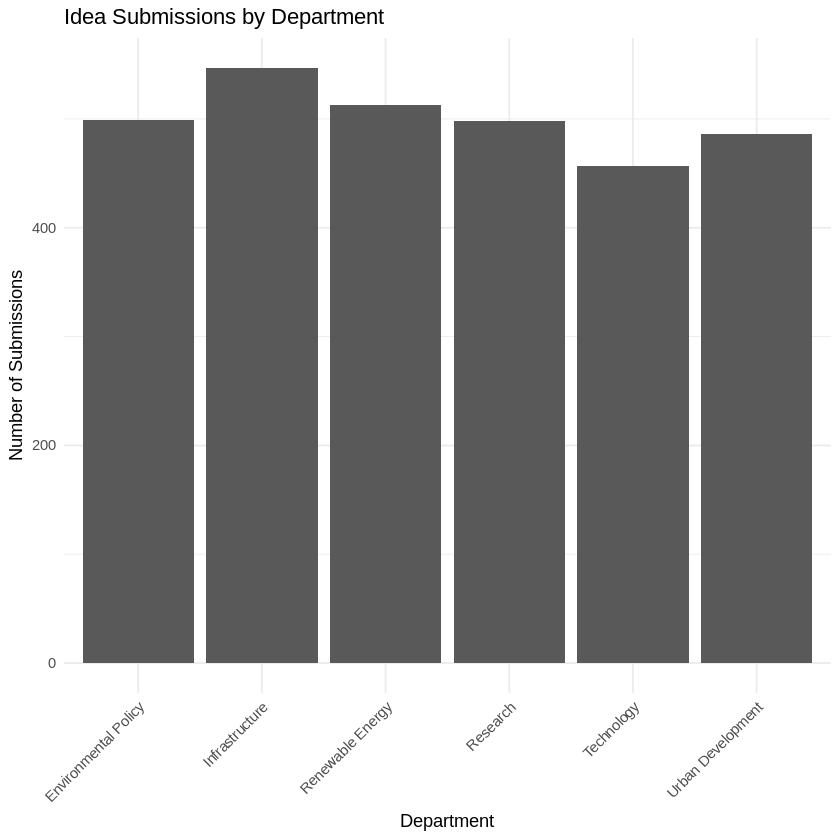

In [ ]:
# Bar Plot – Submissions by Department

# Count ideas per department
dept_counts <- ideas %>%
  count(Department, name = "SubmissionCount")

# Plot bar chart
ggplot(dept_counts, aes(x = Department, y = SubmissionCount)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Idea Submissions by Department",
    x = "Department",
    y = "Number of Submissions"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))



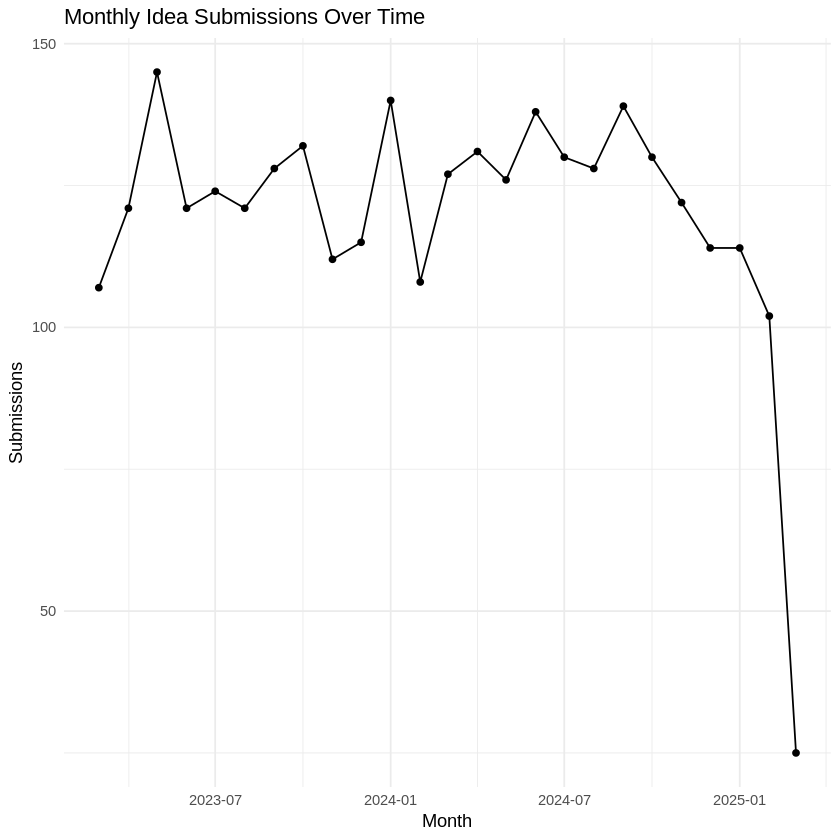

In [ ]:
 # Line Chart: Monthly Submission Trend


 # Prepare monthly counts
ideas$Date <- as.Date(ideas$`Idea.Submission.Date`, format = "%d/%m/%Y")
monthly_trend <- ideas %>%
  group_by(Month = format(Date, "%Y-%m")) %>%
  summarise(SubmissionCount = n()) %>%
  arrange(Month)

# Plot line chart
ggplot(monthly_trend, aes(x = as.Date(paste0(Month, "-01")), y = SubmissionCount)) +
  geom_line() +
  geom_point() +
  labs(
    title = "Monthly Idea Submissions Over Time",
    x = "Month",
    y = "Submissions"
  ) +
  theme_minimal()


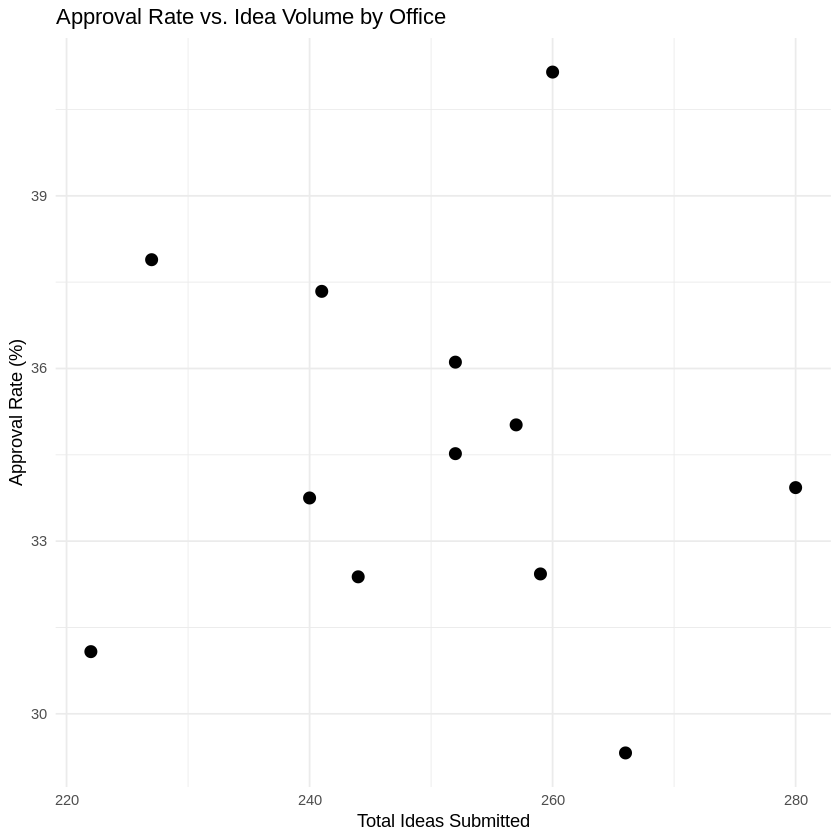

In [ ]:
# Compute total ideas and approval percentage per office
region_summary <- ideas %>%
  group_by(Office.Location) %>%
  summarise(
    TotalIdeas  = n(),
    ApprovalPct = round(sum(Approval.Status == "Approved") / n() * 100, 2)
  )

# Plot scatter chart
ggplot(region_summary, aes(x = TotalIdeas, y = ApprovalPct)) +
  geom_point(size = 3) +
  labs(
    title = "Approval Rate vs. Idea Volume by Office",
    x     = "Total Ideas Submitted",
    y     = "Approval Rate (%)"
  ) +
  theme_minimal()
